In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
from pandas.plotting import parallel_coordinates

pd.set_option('display.max_columns', None)

# ***Comparison***

In [2]:
df = pd.read_csv('/kaggle/input/nba-20202021-season-player-stats/nba2021_advanced.csv')
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [3]:
df1 = df.loc[df.Tm.isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO']), ['Tm', 'ORB%', 'TRB%', 'AST%', 'BLK%', 'USG%']].groupby('Tm').mean()
df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
ATL,5.250000,10.400000,13.893750,1.718750,18.412500
BOS,5.681250,10.362500,12.881250,2.437500,18.325000
BRK,4.394737,10.547368,15.210526,2.147368,18.868421
CHI,4.482353,10.976471,13.500000,1.405882,17.582353
CHO,7.628571,11.742857,14.900000,2.764286,19.357143


### *Heatmap*

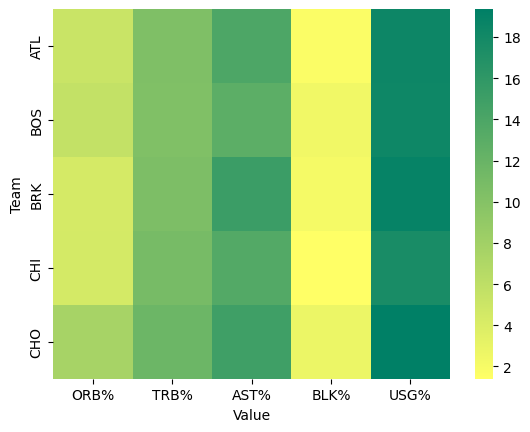

In [4]:
sns.heatmap(df1, cmap='summer_r')
plt.xlabel('Value')
plt.ylabel('Team')
plt.show()

In [5]:
df2 = df.loc[df.Tm.isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO']), ['Tm', 'Age', 'G']].groupby(['Tm', 'Age']).mean().reset_index().pivot(index='Tm', columns='Age', values='G')
df2

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34
Tm,,,,,,,,,,,,,,,
ATL,NaN,9.0,24.0,23.000000,16.250000,NaN,22.000000,25.0,NaN,9.0,21.5,NaN,NaN,16.0,14.0
BOS,NaN,NaN,13.0,20.000000,17.333333,26.0,6.000000,22.0,18.0,26.0,26.0,13.0,NaN,23.0,NaN
BRK,NaN,14.0,NaN,8.500000,26.000000,26.0,15.000000,12.0,3.0,16.5,30.0,NaN,16.0,23.5,30.0
CHI,26.0,27.0,8.5,15.000000,14.000000,7.0,16.500000,11.0,19.5,6.0,16.0,NaN,NaN,23.0,26.0
CHO,15.5,NaN,NaN,22.333333,9.000000,NaN,21.666667,26.0,NaN,20.5,NaN,26.0,NaN,NaN,NaN


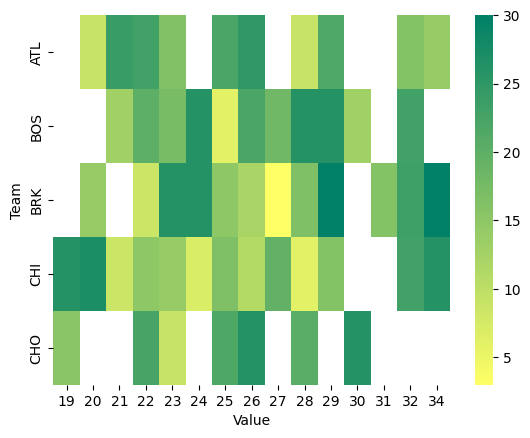

In [6]:
sns.heatmap(df2, cmap='summer_r')
plt.xlabel('Value')
plt.ylabel('Team')
plt.show()

### *Radar chart*

In [7]:
df3 = df1.reset_index()
df3

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,ATL,5.250000,10.400000,13.893750,1.718750,18.412500
1,BOS,5.681250,10.362500,12.881250,2.437500,18.325000
2,BRK,4.394737,10.547368,15.210526,2.147368,18.868421
3,CHI,4.482353,10.976471,13.500000,1.405882,17.582353
4,CHO,7.628571,11.742857,14.900000,2.764286,19.357143


/tmp/ipykernel_32/885001123.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', len(df3.columns) - 1)


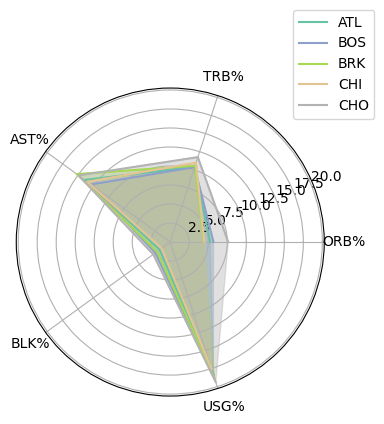

In [8]:
label_loc = np.linspace(start=0, stop=2*np.pi, num=len(df3.columns))[:-1]

plt.figure(figsize=(4, 4))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=list(df3.columns)[1:])
colors = plt.cm.get_cmap('Set2', len(df3.columns) - 1)

for idx, x in df3.drop('Tm', axis=1).iterrows():
    ax.plot(label_loc, x, color=colors(idx), linestyle='solid', label=df3['Tm'][idx])
    ax.fill(label_loc, x, color=colors(idx), alpha=0.4)
    
plt.legend(loc=(0.9, 0.9))
plt.show()

### *Parallel coordinate plot*

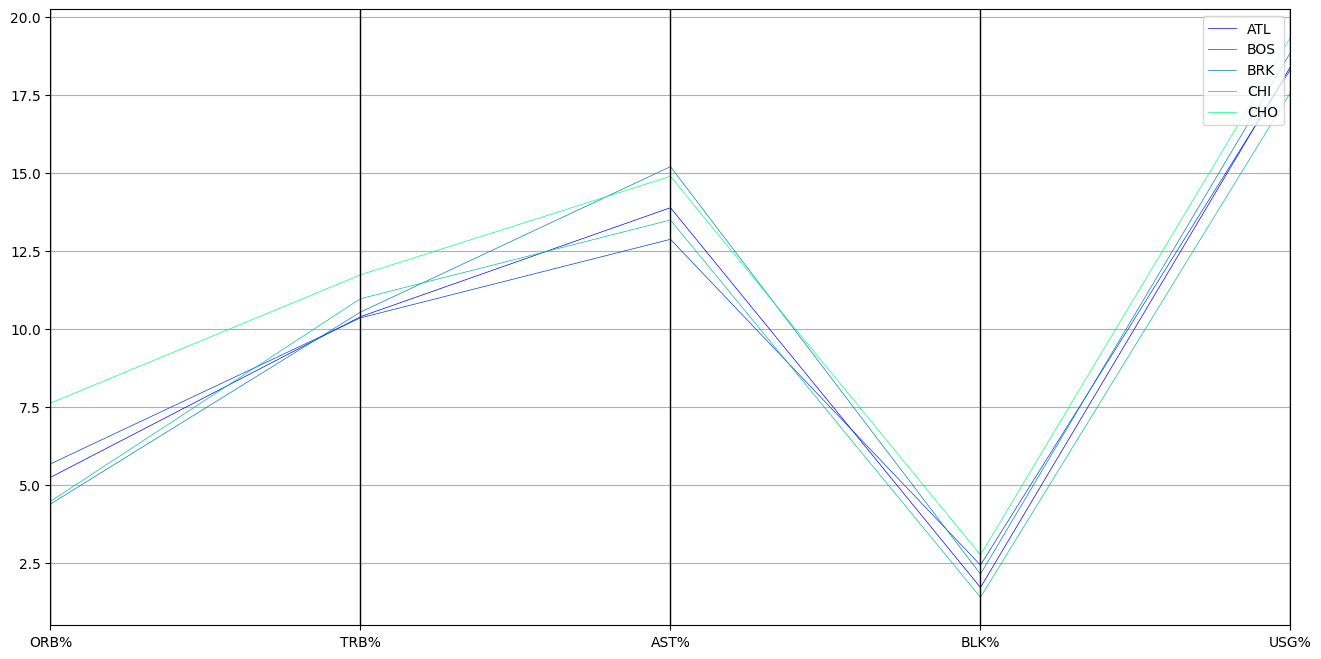

In [9]:
plt.figure(figsize=(16, 8))
parallel_coordinates(df3, 'Tm', colormap='winter', linewidth=0.5)
plt.show()

---   
# ***Distribution***

In [10]:
df = pd.read_csv('/kaggle/input/six-countries-height-samples/six_countries_height_samples.csv')
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


### *Doughnut chart*

In [11]:
df1 = df.loc[df.height_cm >= 175, ['country', 'height_cm']].groupby('country').count().reset_index()
df1

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


Text(0, 0.5, '')

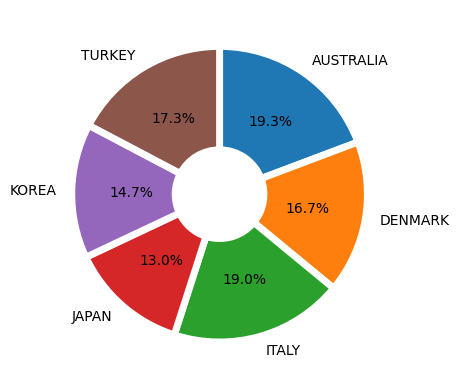

In [13]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
df1.height_cm.plot.pie(labels=df1.country, autopct="%.1f%%", startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.ylabel("")

### *Waffle chart*

In [19]:
!pip install pywaffle
from pywaffle import Waffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 41.9 MB/s eta 0:00:0000:0100:01


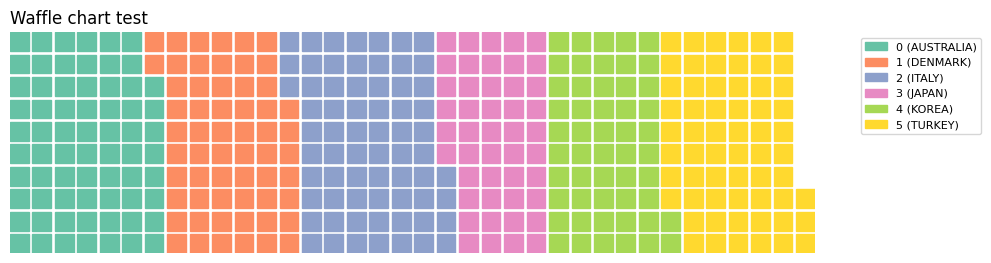

In [25]:
plt.figure(FigureClass=Waffle, plots={
    111: {
        'values': df1['height_cm'],
        'labels': ["{0} ({1})".format(n, v) for n, v in df1['country'].items()],
        'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
        'title': {'label': 'Waffle chart test', 'loc': 'left'}
    }
}, rows=10, figsize=(10, 10))

plt.show()

### *Treemap*

In [14]:
df2 = df.loc[df.height_cm >= 175, ['country', 'sex', 'height_cm']].groupby(['country', 'sex']).count().reset_index()
df2.head()

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60


In [16]:
import plotly.express as px

px.treemap(df2, path=['sex', 'country'], values='height_cm', color='height_cm', color_continuous_scale='viridis')

---   
# ***Relations***

In [26]:
df = pd.read_csv('/kaggle/input/startup-logistic-regression/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### *Scatter plot + Linear line*

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



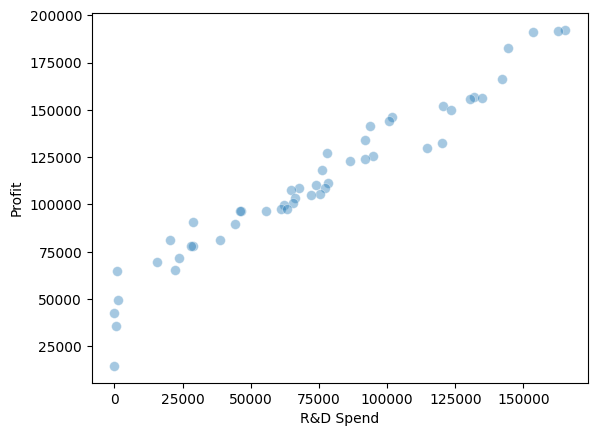

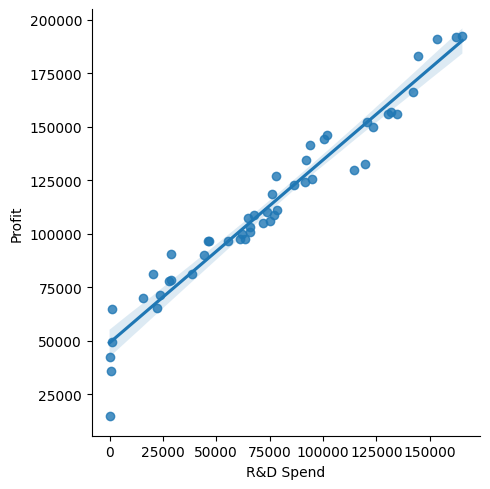

In [31]:
sns.scatterplot(data=df, x='R&D Spend', y='Profit', alpha=0.4, s=50)
sns.lmplot(data=df, x='R&D Spend', y='Profit')

### *Bubble chart*

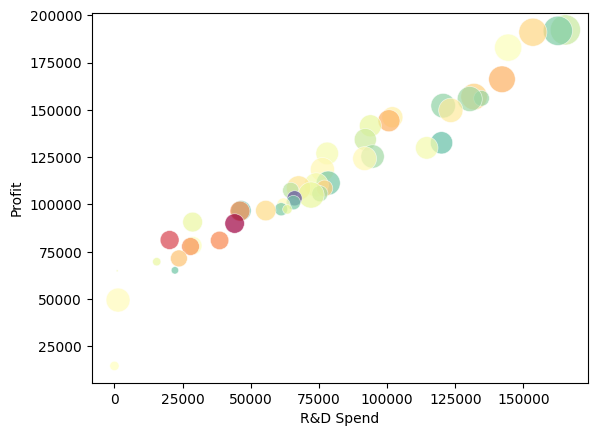

In [43]:
sns.scatterplot(data=df, x='R&D Spend', y='Profit', alpha=0.7, s=df['Marketing Spend']*0.001, c=df['Administration'], cmap='Spectral', legend=None)
plt.show()

### *Boxplot*

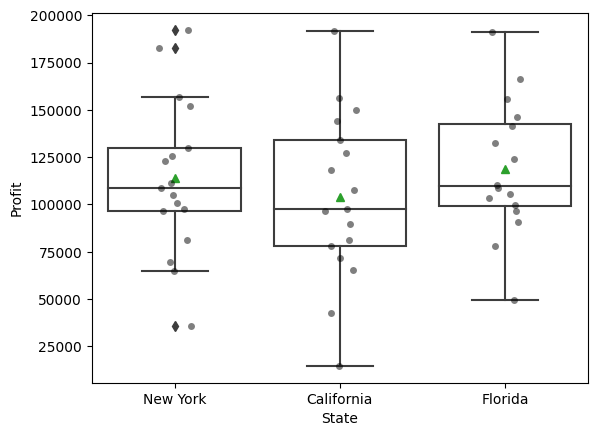

In [134]:
sns.boxplot(data=df, x='State', y='Profit', showmeans=True, boxprops={'facecolor':'None'})
sns.stripplot(data=df, x='State', y='Profit', jitter=True, marker='o', alpha=0.5, color='black')
plt.show()

---   
# ***Maps***

In [45]:
import folium
from folium import Marker, plugins, GeoJson
import plotly.express as px

### *Default*

In [50]:
folium.Map(location=[37.49638, 126.9569], zoom_start=16)

### *Stamen Toner + Marker + CircleMarker*

In [61]:
m = folium.Map(location=[37.49638, 126.9569], tiles='Stamen Toner', zoom_start=15)
folium.CircleMarker(location=[37.49638, 126.9569], radius=100, fill_color='#3246cc', popup='Laurelhurst Park').add_to(m)
folium.Marker([37.49638, 126.9569], popup='The Waterfront').add_to(m)
m

### *MarkerCluster*

In [69]:
df = pd.read_csv('/kaggle/input/starbucks-seoul/Starbucks_Seoul.csv')
df.head()

,name,address,gu_name,latitude,longitude
0,GS타워,서울특별시 강남구 논현로 508 (역삼동),강남구,37.501859,127.037278
1,SSG마켓도곡R,"서울특별시 강남구 언주로30길 57, 타워팰리스Ⅱ F 지하1층 (도곡동)",강남구,37.490298,127.054895
2,W-Mall,서울특별시 금천구 디지털로 188 (가산동),금천구,37.477305,126.887691
3,가든파이브,서울특별시 송파구 충민로 10 (문정동) 가든파이브툴,송파구,37.478232,127.119370
4,가락본동,서울특별시 송파구 송파대로30길 13 (가락동),송파구,37.494895,127.118785


In [99]:
import json

with open('/kaggle/input/starbucks-seoul/Seoul_Gu.json', 'r', encoding='euc_kr') as json_file:
    geo = json.load(json_file)

In [66]:
m = folium.Map([37.541, 126.986], zoom_start=12, width='%100', height='%100')
locations = list(zip(df.latitude, df.longitude))
plugins.MarkerCluster(locations=locations, popups=df['name'].tolist()).add_to(m)
m

### *Scatter*

In [68]:
m = folium.Map([37.541, 126.986], zoom_start=12, width='%100', height='%100')
locations = list(zip(df.latitude, df.longitude))
for x in locations:
    folium.CircleMarker(location=x, radius=1).add_to(m)
m

### *Choropleth + Bubble*

In [71]:
df_m = df.groupby('gu_name').agg({'latitude': 'mean', 'longitude': 'mean', 'name':'count'}).reset_index()
df_m.head()

,gu_name,latitude,longitude,name
0,강남구,37.507603,127.044611,80
1,강동구,37.539914,127.137106,14
2,강북구,37.626866,127.026372,5
3,강서구,37.555716,126.841528,16
4,관악구,37.481759,126.944286,11


In [107]:
m = folium.Map([37.541, 126.986], zoom_start=11, width='%100', height='%100')
locations = list(zip(df_m.latitude, df_m.longitude))

folium.Choropleth(geo_data=geo, fill_color='gray').add_to(m)
for idx, x in enumerate(locations):
    folium.CircleMarker(location=x, radius=float(df_m.iloc[idx]['name']/2), fill_color='blue').add_to(m)

m

In [110]:
with open('/kaggle/input/us-unemployment/folium_us-states.json', 'r') as json_file:
    geo = json.load(json_file)

df = pd.read_csv('/kaggle/input/us-unemployment/us_states_unemployment.csv')
df.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


### *Cartodb Positron*

In [117]:
m = folium.Map(location=[40, -98], zoom_start=3, tiles="Cartodb Positron")
m.choropleth(geo_data=geo, data=df, columns=list(df.columns), key_on='feature.id', fill_color='YlGn', legend_name='Unemployment_Rate')
m

/opt/conda/lib/python3.10/site-packages/folium/folium.py:465: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



### *Connection Map*

In [131]:
import plotly.graph_objects as go

# Destination loc: [37.541, 126.986]
citylocs = zip([37.541, 37.541, 37.541, 37.541, 37.541],
               [35.6804, 38.9072, 14.5995, 48.8566, 55.7558],
               [126.986, 126.986, 126.986, 126.986, 126.986],
               [139.7690, -77.0369, 120.9842, 2.3522, 37.6173])

fig = go.Figure()

for a, b, c, d in citylocs:
    fig.add_trace(go.Scattergeo(
        lat = [a, b],
        lon = [c, d],
        opacity = 1
    ))
    fig.add_trace(go.Scattergeo(
        lat = [a, b],
        lon = [c, d],
        mode = 'lines',
        line = dict(width=2, color='red'),
        opacity = 0.5
    ))

fig.update_layout(
    margin = {'t':0, 'b':0, 'l':0, 'r':0, 'pad':0},
    showlegend = False,
    plot_bgcolor='rgb(255,255,255)',
    geo = dict(
        showcoastlines=False,
        showland=True,
        showcountries=True,
        showocean=True,
        landcolor='rgb(255,255,255)',
        oceancolor='rgb(107,139,164)',
        countrycolor='rgb(2,7,21)',
        framecolor='rgb(179,184,187)',
        projection=dict(
            type='natural earth'
        )
    )
)

fig.show()